### Extracción de Datos

In [2]:
### TelecomX Parte Uno: Extracción y Transformación de Datos
#Cargar los datos directamente desde la API utilizando Python.
%pip install pandas #Instala pandas si no está ya instalado

import requests
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'  #Define la URL: Asigna la URL del archivo JSON a la variable url.
response = requests.get(url) #Realiza la Solicitud GET: Usa requests.get(url) para enviar una solicitud GET a la URL y almacena la respuesta en la variable response.
data = response.json()       #Convierte la Respuesta a JSON: Llama a response.json() para convertir el contenido de la respuesta en un objeto JSON (un diccionario de Python) y lo asigna a la variable data.

df_clientes = pd.DataFrame(data) #Crea un DataFrame de Pandas: Usa pd.DataFrame(data) para crear un DataFrame de Pandas a partir del diccionario data.

print(df_clientes.head())

ERROR: Invalid requirement: '#Instala': Expected package name at the start of dependency specifier
    #Instala
    ^


Note: you may need to restart the kernel to use updated packages.
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...

In [3]:
#Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.
import pandas as pd
df_clientes = pd.json_normalize(data)
df_clientes

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Transformación de Datos

***Diccionario de Datos***
 - *customerID*: número de identificación único de cada cliente
 - *Churn*: si el cliente dejó   o no la empresa
 -  *gender*: género (masculino y femenino)
 -  *SeniorCitizen*: información sobre si un cliente tiene 65 años o más
 -  *Partner*: si el cliente tiene pareja o no
 -  *Dependents*: si el cliente tiene dependientes o no
 -  *tenure*: meses de contrato del cliente
 -  *PhoneService*: suscripción de servicio telefónico
 -  *MultipleLines*: suscripción a más de una línea de teléfono
 -  *InternetService*: suscripción a un proveedor de internet
 -  *OnlineSecurity*: suscripción adicional de seguridad online
 -  *OnlineBackup*: suscripción adicional de backup online
 -  *DeviceProtection*: suscripción adicional de protección en el dispositivo
 -  *TechSupport*: suscripción adicional de soporte técnico, menos tiempo de espera
 -  *StreamingTV*: suscripción de TV por cable
 -  *StreamingMovies*: suscripción de streaming de películas
 -  *Contract*: tipo de contrato
 -  *PaperlessBilling*: si el cliente prefiere recibir la factura online
 -  *PaymentMethod*: forma de pago
 -  *Charges.Monthly*: total de todos los servicios del cliente por mes
 -  *Charges.Total*: total gastado por el cliente

In [4]:
### Conoce el conjunto de datos
#Explorar las columnas del dataset y verificar sus tipos de datos. Consultar diccionario para comprender el significado de cada columna.
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
#Identificar las columnas más relevantes para el análisis de evasión.
df_clientes.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
df_clientes.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


### Verificación y Limpieza de datos

In [7]:
# Verificar si hay valores únicos en cada columna
valores_unicos = pd.DataFrame({
    'Columna': df_clientes.columns,
    'Valores únicos': [df_clientes[col].nunique() for col in df_clientes.columns]
})
display(valores_unicos)

,Columna,Valores únicos
0,customerID,7267
1,Churn,3
2,customer.gender,2
3,customer.SeniorCitizen,2
4,customer.Partner,2
5,customer.Dependents,2
6,customer.tenure,73
7,phone.PhoneService,2
8,phone.MultipleLines,3
9,internet.InternetService,3


In [8]:
# Verificar si hay valores nulos en cada columna
valores_nulos = pd.DataFrame({
    'Columna': df_clientes.columns,
    'Valores nulos': [df_clientes[col].isnull().sum() for col in df_clientes.columns]
})
display(valores_nulos)

,Columna,Valores nulos
0,customerID,0
1,Churn,0
2,customer.gender,0
3,customer.SeniorCitizen,0
4,customer.Partner,0
5,customer.Dependents,0
6,customer.tenure,0
7,phone.PhoneService,0
8,phone.MultipleLines,0
9,internet.InternetService,0


In [9]:
# Verificar si hay duplicados
duplicates = df_clientes.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")
print('-' * 40)

Número de filas duplicadas: 0
----------------------------------------


In [10]:
# Verificar si hay vacíos o espacios en blanco
espacios_en_blanco = pd.DataFrame({
    'Columna': df_clientes.columns,
    'Valores vacíos o espacios en blanco': [df_clientes[col].apply(lambda x: isinstance(x, str) and x.strip() == '').sum() for col in df_clientes.columns]
})
display(espacios_en_blanco)

,Columna,Valores vacíos o espacios en blanco
0,customerID,0
1,Churn,224
2,customer.gender,0
3,customer.SeniorCitizen,0
4,customer.Partner,0
5,customer.Dependents,0
6,customer.tenure,0
7,phone.PhoneService,0
8,phone.MultipleLines,0
9,internet.InternetService,0


In [11]:
# 224 registros tienen el campo 'Churn' con un string vacio y 11 regisros en la columna account.Charges.Total
# Regularizar los datos eliminando los espacios en blanco y convirtiendo a -1 los valores nulos en la columna 'Churn' y a 0 los nulos en 'account.Charges.Total'
df_clientes['Churn'] = df_clientes['Churn'].apply(lambda x: x.strip() if isinstance(x, str) else x).replace('', -1)
df_clientes['account.Charges.Total'] = df_clientes['account.Charges.Total'].apply(lambda x: x.strip() if isinstance(x, str) else x).replace('', 0)

In [12]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Columna de Cuentas Diarias

In [13]:
#Renombrar columnas para facilitar su manejo.
df_clientes.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Cancelacion",
    "customer.gender": "Genero",
    "customer.SeniorCitizen": "Adulto_Mayor",
    "customer.Partner": "Tiene_Pareja",
    "customer.Dependents": "Tiene_Dependientes",
    "customer.tenure": "Meses_Contrato",
    "phone.PhoneService": "Suscripcion_Servicio_Telefono",
    "phone.MultipleLines": "Suscripcion_Multiples_Lineas",
    "internet.InternetService": "Suscripcion_Servicio_Internet",
    "internet.OnlineSecurity": "Suscripcion_Seguridad_En_Linea",
    "internet.OnlineBackup": "Suscripcion_Respaldo_En_Linea",
    "internet.DeviceProtection": "Suscripcion_Proteccion_Dispositivo",
    "internet.TechSupport": "Suscripcion_Soporte_Técnico",
    "internet.StreamingTV": "Suscripcion_TV_Streaming",
    "internet.StreamingMovies": "Suscripcion_Películas_Streaming",
    "account.Contract": "Tipo_Contrato",
    "account.PaperlessBilling": "Factura_Electronica",
    "account.PaymentMethod": "Metodo_Pago",
    "account.Charges.Monthly": "Factura_Mensual",
    "account.Charges.Total": "Cargos_Totales"
}, inplace=True)
df_clientes.head()

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Servicio_Internet,...,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Cargos_Totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [14]:
#Crear columna de Cuentas Diarias utilizando la columna Factura Mensual para calcular el valor diario.
df_clientes['Cuentas_Diarias'] = df_clientes['Factura_Mensual'] / 30
df_clientes['Cuentas_Diarias'] = df_clientes['Cuentas_Diarias'].round(2)

In [15]:
df_clientes.head()

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Servicio_Internet,...,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.80


### Carga y Análisis

***Análisis Descriptivo***

In [16]:
#! Calcular métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

#Mostrar cantidad de clientes que han cancelado el servicio
cancelados = df_clientes[df_clientes['Cancelacion'] == 'Yes'].shape[0]
print(f"Cantidad de clientes que han cancelado el servicio: {cancelados}")

#Mostrar cantidad de clientes por tipo de contrato
contratos = pd.DataFrame({
    'Tipo_Contrato': df_clientes['Tipo_Contrato'].unique(),
    'Cantidad': [df_clientes[df_clientes['Tipo_Contrato'] == contrato].shape[0] for contrato in df_clientes['Tipo_Contrato'].unique()]
})
display(contratos)

#Mostrar cantidad de clientes por método de pago
metodos_pago = pd.DataFrame({
    'Metodo_Pago': df_clientes['Metodo_Pago'].unique(),
    'Cantidad': [df_clientes[df_clientes['Metodo_Pago'] == metodo].shape[0] for metodo in df_clientes['Metodo_Pago'].unique()]
})
display(metodos_pago)
#Mostrar cantidad de clientes por servicio de internet
servicios_internet = pd.DataFrame({
    'Suscripcion_Servicio_Internet': df_clientes['Suscripcion_Servicio_Internet'].unique(),
    'Cantidad': [df_clientes[df_clientes['Suscripcion_Servicio_Internet'] == servicio].shape[0] for servicio in df_clientes['Suscripcion_Servicio_Internet'].unique()]
})
display(servicios_internet)
#Mostrar cantidad de clientes por servicio de teléfono
servicios_telefono = pd.DataFrame({
    'Suscripcion_Servicio_Telefono': df_clientes['Suscripcion_Servicio_Telefono'].unique(),
    'Cantidad': [df_clientes[df_clientes['Suscripcion_Servicio_Telefono'] == servicio].shape[0] for servicio in df_clientes['Suscripcion_Servicio_Telefono'].unique()]
})
display(servicios_telefono)

#Mostrar cantidad de clientes totales
total_clientes = len(df_clientes)
print(f"Total de clientes: {total_clientes}")
#Mostrar cantidad de clientes por género
generos = pd.DataFrame({
    'Genero': df_clientes['Genero'].unique(),
    'Cantidad': [df_clientes[df_clientes['Genero'] == genero].shape[0] for genero in df_clientes['Genero'].unique()]
})
display(generos)

Cantidad de clientes que han cancelado el servicio: 1869


,Tipo_Contrato,Cantidad
0,One year,1519
1,Month-to-month,4005
2,Two year,1743


,Metodo_Pago,Cantidad
0,Mailed check,1665
1,Electronic check,2445
2,Credit card (automatic),1568
3,Bank transfer (automatic),1589


,Suscripcion_Servicio_Internet,Cantidad
0,DSL,2488
1,Fiber optic,3198
2,No,1581


,Suscripcion_Servicio_Telefono,Cantidad
0,Yes,6560
1,No,707


Total de clientes: 7267


,Genero,Cantidad
0,Female,3592
1,Male,3675


***Distribución de Evasión (Churn)***

In [17]:
#En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes.
tasa_cancelacion_general = df_clientes['Cancelacion'].value_counts().to_frame()
tasa_cancelacion_general.columns = ['Frecuencia Absoluta']
tasa_cancelacion_general['Frecuencia Relativa (%)'] = (tasa_cancelacion_general['Frecuencia Absoluta'] / total_clientes * 100).round(2)
tasa_cancelacion_general.index.name = 'Cancelacion'
tasa_cancelacion_general.reset_index(inplace=True)
tasa_cancelacion_general

,Cancelacion,Frecuencia Absoluta,Frecuencia Relativa (%)
0,No,5174,71.20
1,Yes,1869,25.72
2,-1,224,3.08


In [21]:
%pip install plotly
import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(df_clientes, x='Cancelacion', nbins=3, title='Histograma Cancelación', text_auto=True,
                color='Cancelacion',
                color_discrete_map={0: 'blue', 1: 'red', -1: 'gray'}) # Assign colors: 0 (No) to blue, 1 (Yes) to red, -1 (Unknown) to gray
fig.update_layout(title=dict(text='<b>Histograma Cancelación</b>', font=dict(size=18)))
fig.update_xaxes(tickmode='array', tickvals=[-1, 0, 1], ticktext=['No definidos', 'Activos', 'De Baja'])

# Update legend labels
fig.for_each_trace(lambda t: t.update(name=t.name.replace('0', 'Activos').replace('1', 'De Baja').replace("-1", 'No definidos')))

fig.show()

Note: you may need to restart the kernel to use updated packages.


In [24]:
#! ARREGLAR- ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed
%pip install nbformat
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 7.9 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.1 MB 9.6 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 14.7 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------------ --------------------- 3.1/7.0 MB 15.2 MB/s eta 0:00:01
   --------------------------------- ------ 5.8/7.0 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 14.0 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
 

C:\Users\hp\AppData\Local\Temp\ipykernel_14944\2259957908.py:13: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



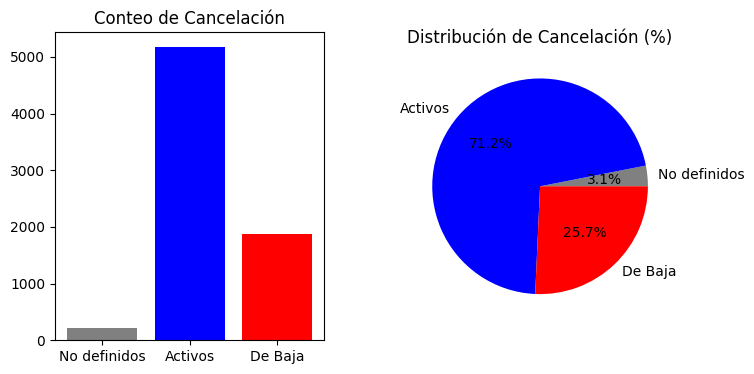

In [ ]:
## Análisis de cancelación.
#En este paso, el objetivo es analizar la tasa de cancelación de clientes y su relación con otras variables del dataset.
import matplotlib.pyplot as plt
import pandas as pd # Import pandas
import plotly.express as px

# Get the counts of each cancellation category
cancelacion_counts = df_clientes['Cancelacion'].value_counts().reset_index()
cancelacion_counts.columns = ['Cancelacion', 'Count']

# Standardize Cancelacion values to integers for sorting and color mapping
cancelacion_map = {'No': 0, 'Yes': 1, '-1': -1}
cancelacion_counts['Cancelacion_Num'] = cancelacion_counts['Cancelacion'].replace(cancelacion_map).astype(int)

# Map numerical values to text labels for plotting
cancellation_labels = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}
cancelacion_counts['Cancelacion_Text'] = cancelacion_counts['Cancelacion_Num'].map(cancellation_labels)

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Add the bar chart for cancellation counts to the first subplot
# Sort by the numerical value to ensure consistent order
cancelacion_counts = cancelacion_counts.sort_values('Cancelacion_Num')
axs[0].bar(cancelacion_counts['Cancelacion_Text'], cancelacion_counts['Count'], color=['gray', 'blue', 'red']) # Use appropriate colors
axs[0].set_title('Conteo de Cancelación') # Changed title to reflect bar chart of counts



# Add a pie chart for cancellation distribution to the second subplot
axs[1].pie(cancelacion_counts['Count'], labels=cancelacion_counts['Cancelacion_Text'], autopct='%1.1f%%', colors=['gray', 'blue', 'red']) # Use counts and labels for pie chart
axs[1].set_title('Distribución de Cancelación (%)') # Changed title for clarity

plt.show()

In [34]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 2 columns
fig_subplots = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'domain'}]],
                            subplot_titles=('Histograma de Cancelación', 'Distribución General de Cancelación (%)'))

# Generate data for the bar chart (counts of cancellation)
cancelacion_counts = df_clientes['Cancelacion'].value_counts().reset_index()
cancelacion_counts.columns = ['Cancelacion', 'Count']

# Map string values to integers for sorting and plotting
cancelacion_map = {'No': 0, 'Yes': 1, '-1': -1}
# Ensure all Cancelacion values are strings for mapping
cancelacion_counts['Cancelacion'] = cancelacion_counts['Cancelacion'].astype(str)
cancelacion_counts['Cancelacion_Num'] = cancelacion_counts['Cancelacion'].map(cancelacion_map).astype(int)

# Map numerical values to text labels for plotting
cancellation_map = {0: 'Activos', 1: 'De Baja', -1: 'No definidos'}
cancelacion_counts['Cancelacion_Text'] = cancelacion_counts['Cancelacion_Num'].map(cancellation_map)

# Define colors for each category
colors = {'Activos': 'lightblue', 'De Baja': 'lightcoral', 'No definidos': 'gray'}

# Sort by the numerical value to ensure consistent order for plotting and colors
cancelacion_counts = cancelacion_counts.sort_values('Cancelacion_Num')

# Add bar traces for each cancellation category to the first subplot
for status_num, text_status in cancellation_map.items():
    subset = cancelacion_counts[cancelacion_counts['Cancelacion_Num'] == status_num]
    if not subset.empty:
        fig_subplots.add_trace(go.Bar(x=[text_status], y=[subset['Count'].iloc[0]], # Use list for x and y to plot single bar
                                text=[subset['Count'].iloc[0]], textposition='auto',
                                marker_color=colors[text_status], # Set color
                                name=text_status, # Set legend name for each category
                                showlegend=True, legendgroup='group1'), # Show legend and assign legend group
                                row=1, col=1)

# Prepare data for the pie chart (Overall Churn Percentage)
# Check if overall_churn_rate is defined, if not, calculate it
if 'overall_churn_rate' not in locals() or overall_churn_rate is None:
    # Ensure all values are strings before mapping
    overall_churn_rate = df_clientes['Cancelacion'].astype(str).map(cancelacion_map).value_counts(normalize=True) * 100

# Sort overall_churn_rate by index to ensure consistent colors and labels
overall_churn_rate = df_clientes['Cancelacion'].astype(str).map(cancelacion_map).value_counts(normalize=True) * 100
overall_churn_rate_sorted = overall_churn_rate.sort_index()

labels = [cancellation_map.get(i, str(i)) for i in overall_churn_rate_sorted.index]
values = overall_churn_rate_sorted.values.tolist()

# Define colors for the pie chart slices based on the sorted index values
# Mapping: -1 (Desconocida) -> gray, 0 (No Cancelacion) -> blue, 1 (Cancelacion) -> red
pie_colors_map = {-1: 'gray', 0: 'blue', 1: 'red'}
pie_colors = [pie_colors_map.get(i, 'gray') for i in overall_churn_rate_sorted.index]

# Add pie chart trace to the second subplot
fig_subplots.add_trace(go.Pie(labels=labels, values=values, textinfo='percent+label', name='Cancelación General',
                        marker=dict(colors=pie_colors), # Set colors for pie slices
                        showlegend=True, legendgroup='group2'), # Show legend and assign legend group
                        row=1, col=2)

# Update layout (main title and legend)
fig_subplots.update_layout(height=400, showlegend=True,
                        title=dict(text='<b>Análisis de Cancelación</b>', font=dict(size=18), x=0.5, xanchor='center'), # Center the main title
                        legend=dict(x=0.5, y=0.5, xanchor='center', yanchor='middle')) # Position legend at the exact center

# Show the combined figure
fig_subplots.show()

# Export the figure
fig_subplots.write_html("1.analisis_cancelacion.html")
print("Gráfico exportado como 'analisis_cancelacion.html'")

Gráfico exportado como 'analisis_cancelacion.html'


***Recuento de evasión por variables categóricas***

In [39]:
# Distribuir la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

# Mostrar evasión por género
fig_genero = px.histogram(df_clientes, x='Genero', color='Cancelacion', barmode='group',
                          title='Evasión por Género', text_auto=True,
                          color_discrete_map={'No': 'blue', 'Yes': 'red', '-1': 'gray'})
fig_genero.update_layout(title=dict(text='<b>Evasión por Género</b>', font=dict(size=18)))
fig_genero.show()

# Mostrar evasión por tipo de contrato
fig_contrato = px.histogram(df_clientes, x='Tipo_Contrato', color='Cancelacion', barmode='group',
                            title='Evasión por Tipo de Contrato', text_auto=True,
                            color_discrete_map={'No': 'blue', 'Yes': 'red', '-1': 'gray'})
fig_contrato.update_layout(title=dict(text='<b>Evasión por Tipo de Contrato</b>', font=dict(size=18)))
fig_contrato.show()

# Mostrar evasión por método de pago
fig_metodo_pago = px.histogram(df_clientes, x='Metodo_Pago', color='Cancelacion', barmode='group',
                               title='Evasión por Método de Pago', text_auto=True,
                               color_discrete_map={'No': 'blue', 'Yes': 'red', '-1': 'gray'})
fig_metodo_pago.update_layout(title=dict(text='<b>Evasión por Método de Pago</b>', font=dict(size=18)))
fig_metodo_pago.show()

In [ ]:
# Distribuir la evasión según variables numéricas, como total gastado, tiempo de permanencia, entre otras.

#